In [1]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### General Imports
import matplotlib.pyplot as plt
from glob import glob as glob
import numpy as np
import pandas as pd
import os
import sys
from numpy import linalg as LA
from sklearn import metrics
from sklearn import preprocessing
from scipy import interp

sys.path.insert(0, os.path.abspath('../..'))
from diffeochin.systemsetup import systemsetup_server as systemsetup
import diffeochin.utils.eval_utils as eutils

info_file = systemsetup.INFO_FILE
n_components = 5
pairwise_embedding = 'kpca_rbf'

methods = ['atlas_curve', 'atlas_surface', 'pairwise_curve', 'pairwise_surface']
data = ['cleaned_curve', 'simplified0.3', 'cleaned_curve', 'simplified0.3']
template_type = ['/template_5', '/template_5', '', '']


In [2]:
def plot_roc_curves(ground_truth, predictions, C, names, title, outfile=None, ax=None, plotit=True):

    colors  = ['lightcoral', 'lightcoral', 'cornflowerblue', 'cornflowerblue']
    style = ['--', '-', '--', '-']
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(5,4))

    for j in range(len(names)):
        gt = binarize(ground_truth[j], C)

        fpr, tpr, auc = roc_macro(gt, predictions[j], C)
        ax.plot(fpr, tpr, style[j],
                label='{:s} (AUC={:1.2f})'.format(names[j], auc),
                color=colors[j], linewidth=2)
    ax.plot([0, 1], [0, 1], '--', color='lightgray', lw=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc="best", fontsize=10)

    if outfile is not None:
        plt.savefig(outfile, dpi = 300)
    # if plotit:
    plt.show()


def roc_macro(ground_truth, prediction, C):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(C):
        fpr[i], tpr[i], _ = metrics.roc_curve(ground_truth[:, i], prediction[:, i],)
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(C)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(C):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= C

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

    return fpr["macro"], tpr["macro"], roc_auc["macro"]


def binarize(input, C):

    N = len(input)
    classes_num = set(input)
    # Binarize the output
    if C==2:
        input_bin = np.zeros((N, 2))
        input_bin[:,0] = np.array([0 if g==1 else 1 for g in input])
        input_bin[:,1] = input
        input = input_bin
    else:
        input = preprocessing.label_binarize(input, classes=list(classes_num))

    return input


## Taxon classification

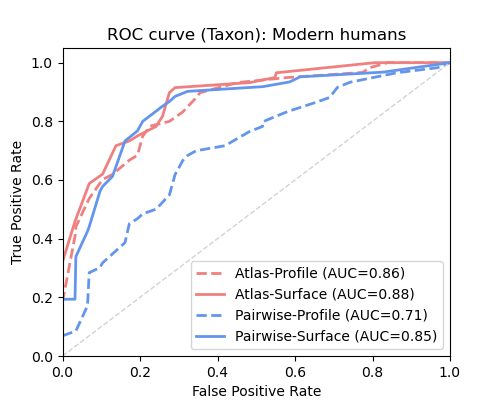

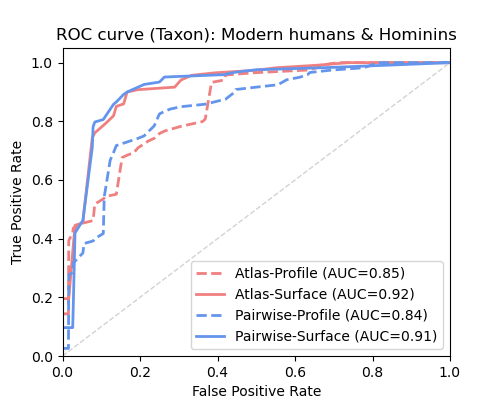

In [3]:
%matplotlib widget

pfile = systemsetup.OUT_DIR + '/final_results/Taxon_ROC_MH.png'

##
#   Modern humans
#
method_name = ['Atlas-Profile', 'Atlas-Surface', 'Pairwise-Profile', 'Pairwise-Surface']
subset_name = 'modern_humans'
subset = ['European', 'African']
cols = ['class 0: European', 'class 1: African']
OUT_DIRs = ['{}/{}/{}-{}{}'.format(systemsetup.OUT_DIR, m.replace('_', '/'),subset_name, d, t) for m, d, t in zip(methods, data, template_type)]

ground_truth = []
predictions = []
for outdir in OUT_DIRs:
    stat_tax = outdir + '/statistics_5/statistics_taxon.xlsx' if 'atlas' in outdir else outdir + '/statistics_5/kpca_rbf/statistics_taxon.xlsx'
    df = eutils.read_data(stat_tax, sheet='LogReg_CV_ncomp5')

    ground_truth.append(df['ground truth'])
    predictions.append(df[cols].to_numpy())

plot_roc_curves(ground_truth, predictions, 2, method_name, 'ROC curve (Taxon): Modern humans', plotit=True, outfile=None)

##
#   All specimen
#
pfile = systemsetup.OUT_DIR + '/final_results/Taxon_ROC_AS.png'

method_name = ['Atlas-Profile', 'Atlas-Surface', 'Pairwise-Profile', 'Pairwise-Surface']
subset_name = 'all_specimen'
subset = ['European', 'African', 'Paranthropus', 'Australopithecus']
cols = ['class 0: European', 'class 1: African', 'class 2: Paranthropus', 'class 3: Australopithecus']
OUT_DIRs = ['{}/{}/{}-{}{}'.format(systemsetup.OUT_DIR, m.replace('_', '/'),subset_name, d, t) for m, d, t in zip(methods, data, template_type)]

ground_truth = []
predictions = []
for outdir in OUT_DIRs:
    stat_tax = outdir + '/statistics_5/statistics_taxon.xlsx' if 'atlas' in outdir else outdir + '/statistics_5/kpca_rbf/statistics_taxon.xlsx'
    df = eutils.read_data(stat_tax, sheet='LogReg_CV_ncomp5')

    ground_truth.append(df['ground truth'])
    predictions.append(df[cols].to_numpy())

plot_roc_curves(ground_truth, predictions, 4, method_name, 'ROC curve (Taxon): Modern humans & Hominins', outfile=None, plotit=True)


## Gender

/home/veronika/Out/Aesop/output4.0/atlas/curve/modern_humans-cleaned_curve/template_5
/home/veronika/Out/Aesop/output4.0/atlas/surface/modern_humans-simplified0.3/template_5
/home/veronika/Out/Aesop/output4.0/pairwise/curve/modern_humans-cleaned_curve
/home/veronika/Out/Aesop/output4.0/pairwise/surface/modern_humans-simplified0.3


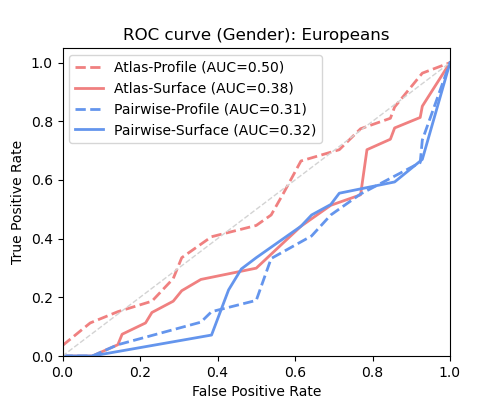

/home/veronika/Out/Aesop/output4.0/atlas/curve/modern_humans-cleaned_curve/template_5
/home/veronika/Out/Aesop/output4.0/atlas/surface/modern_humans-simplified0.3/template_5
/home/veronika/Out/Aesop/output4.0/pairwise/curve/modern_humans-cleaned_curve
/home/veronika/Out/Aesop/output4.0/pairwise/surface/modern_humans-simplified0.3


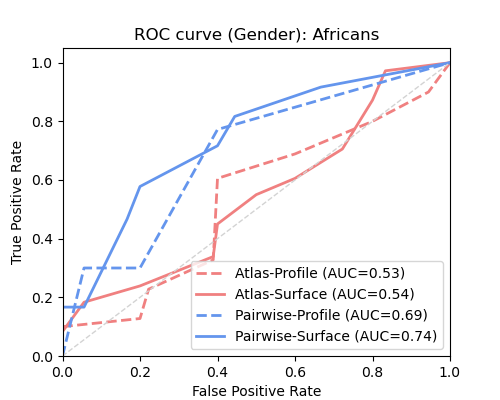

In [4]:
%matplotlib widget

pfile = systemsetup.OUT_DIR + '/final_results/Gender_ROC_E.png'

##
#   Modern humans
#
method_name = ['Atlas-Profile', 'Atlas-Surface', 'Pairwise-Profile', 'Pairwise-Surface']
subset_name = 'modern_humans'
subset = ['European', 'African']
cols = ['class 0: European_male', 'class 1: European_female']
OUT_DIRs = ['{}/{}/{}-{}{}'.format(systemsetup.OUT_DIR, m.replace('_', '/'),subset_name, d, t) for m, d, t in zip(methods, data, template_type)]

ground_truth = []
predictions = []
for outdir in OUT_DIRs:
    print(outdir)
    stat_tax = outdir + '/statistics_5/statistics_gender.xlsx' if 'atlas' in outdir else outdir + '/statistics_5/kpca_rbf/statistics_gender.xlsx'
    
    df = eutils.read_data(stat_tax, sheet='LogReg_CV_ncomp51')
    ground_truth.append(df['ground truth'])
    predictions.append(df[cols].to_numpy())

plot_roc_curves(ground_truth, predictions, 2, method_name, 'ROC curve (Gender): Europeans', plotit=True, outfile=None)

pfile = systemsetup.OUT_DIR + '/final_results/Gender_ROC_A.png'
cols = ['class 0: African_male', 'class 1: African_female']
ground_truth = []
predictions = []
for outdir in OUT_DIRs:
    print(outdir)
    stat_tax = outdir + '/statistics_5/statistics_gender.xlsx' if 'atlas' in outdir else outdir + '/statistics_5/kpca_rbf/statistics_gender.xlsx'
    
    df = eutils.read_data(stat_tax, sheet='LogReg_CV_ncomp52')
    ground_truth.append(df['ground truth'])
    predictions.append(df[cols].to_numpy())

plot_roc_curves(ground_truth, predictions, 2, method_name, 'ROC curve (Gender): Africans', plotit=True, outfile=None)